# Context
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

## Import libraries

In [474]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Import Dataset

In [475]:
train_data=pd.read_csv("Train.csv")
test_data=pd.read_csv("Test.csv")

In [476]:
train_data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


## DATASET OVERVIEW

View first 10 rows

In [477]:
#First 10 rows
train_data.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [478]:
#Last 10 rows
train_data.tail(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8058,460674,Female,No,31,Yes,Entertainment,0.0,Low,3.0,Cat_3,A
8059,460132,Male,No,39,Yes,Healthcare,3.0,Low,2.0,Cat_6,D
8060,463613,Female,Yes,48,Yes,Artist,0.0,Average,6.0,Cat_6,A
8061,465231,Male,Yes,65,No,Artist,0.0,Average,2.0,Cat_6,C
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


In [479]:
#random sample of 20 rows
train_data.sample(20)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
7192,467631,Male,Yes,72,Yes,Lawyer,3.0,High,2.0,Cat_6,C
1955,461260,Male,No,20,No,Marketing,1.0,Low,3.0,Cat_4,D
276,465974,Male,Yes,52,Yes,Executive,7.0,High,4.0,Cat_4,C
2929,459565,Male,No,47,Yes,Entertainment,2.0,Low,NaN,Cat_1,A
7555,464371,Male,Yes,49,Yes,Artist,1.0,Low,4.0,Cat_3,C
629,463040,Male,Yes,75,No,Lawyer,1.0,High,2.0,Cat_6,B
5759,461549,Female,Yes,68,Yes,Artist,NaN,Average,2.0,Cat_6,B
2899,463678,Female,No,32,No,Healthcare,1.0,Low,5.0,Cat_4,B
7354,465978,Male,Yes,50,Yes,Artist,1.0,Average,3.0,Cat_6,B
6154,462623,Male,No,35,No,Healthcare,NaN,Low,1.0,Cat_4,D


In [480]:
def data_overview(data, title):
    overview_analysis = {f'{title}':[data.shape[1], data.shape[0], 
                                     data.isnull().any(axis=1).sum(), 
                                     data.isnull().any(axis=1).sum()/len(data)*100,
                                     data.duplicated().sum(),
                                    data.duplicated().sum()/len(data)*100, 
                                     sum((data.dtypes == 'object') & (data.nunique() > 2)),
                                     sum((data.dtypes == 'object') & (data.nunique() < 3)),
                                     data.select_dtypes(include=['int64', 'float64']).shape[1]
                                    ]}
    overview_analysis=pd.DataFrame(overview_analysis, index=['Num_Columns','Num_Rows','Missing_Values','Missing_Values %',
                                                             'Num_Duplicates', 'Num_Duplicates %','Num_Categorical','Num_Boolean','Num_Numerical']).round(2)
    return overview_analysis

data_overview(train_data, "Data_Overview")   

,Data_Overview
Num_Columns,11.00
Num_Rows,8068.00
Missing_Values,1403.00
Missing_Values %,17.39
Num_Duplicates,0.00
Num_Duplicates %,0.00
Num_Categorical,4.00
Num_Boolean,3.00
Num_Numerical,4.00


In [481]:
def variables_overview1 (data):
    variable_details = {'unique':data.nunique(),
              'dtype':data.dtypes,
             'null':data.isna().sum(),
             'null %':data.isna().sum()/len(data)*100
             }
    variable_details = pd.DataFrame(variable_details)
    return variable_details
variables_overview=variables_overview1(train_data)
variables_overview

,unique,dtype,null,null %
ID,8068,int64,0,0.000000
Gender,2,object,0,0.000000
Ever_Married,2,object,140,1.735250
Age,67,int64,0,0.000000
Graduated,2,object,78,0.966782
Profession,9,object,124,1.536936
Work_Experience,15,float64,829,10.275161
Spending_Score,3,object,0,0.000000
Family_Size,9,float64,335,4.152206
Var_1,7,object,76,0.941993


#### SUMMARY OF STATISTICS
Compute summary of statistics for the numerical columns in the DataFrame.

In [482]:
train_data.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


### Compute summary of statistics for the categorical columns in the DataFrame.

In [483]:
train_data.describe(include='object')

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


## DATA CLEANSING

### Encoding Categorical Variables and missing values

In [484]:
#drop ID column
train_data=train_data.drop(columns=['ID'])

In [485]:
train_data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [486]:
#Categorical Variables with missing values
cat_miss_values = variables_overview.loc[(variables_overview["dtype"] == "object") & (variables_overview["null"] > 0)]
cat_miss_values

,unique,dtype,null,null %
Ever_Married,2,object,140,1.735250
Graduated,2,object,78,0.966782
Profession,9,object,124,1.536936
Var_1,7,object,76,0.941993


In [487]:
#Categorical Variables with missing values count
cat_miss_values_count = cat_miss_values.index.to_list()
for i in cat_miss_values_count:
    print(f'Value counts of {i} column')
    print(train_data[i].value_counts()/len(train_data)*100, end="\n\n")

Value counts of Ever_Married column
Yes    57.548339
No     40.716411
Name: Ever_Married, dtype: float64

Value counts of Graduated column
Yes    61.576599
No     37.456619
Name: Graduated, dtype: float64

Value counts of Profession column
Artist           31.184928
Healthcare       16.509668
Entertainment    11.762519
Engineer          8.663857
Doctor            8.527516
Lawyer            7.721864
Executive         7.424393
Marketing         3.619236
Homemaker         3.049083
Name: Profession, dtype: float64

Value counts of Var_1 column
Cat_6    64.923153
Cat_4    13.497769
Cat_3    10.188399
Cat_2     5.230540
Cat_7     2.516113
Cat_1     1.648488
Cat_5     1.053545
Name: Var_1, dtype: float64



In [488]:
#Numerical Variables with missing values

num_miss_values = variables_overview.loc[~(variables_overview["dtype"] == "object") & (variables_overview["null"] > 0)]
num_miss_values

,unique,dtype,null,null %
Work_Experience,15,float64,829,10.275161
Family_Size,9,float64,335,4.152206


#### Encoding Categorical Variables
Categorical variables can be divided into two categories, nominal (no particular order) and Ordinal (order between values). The dataset contains only nominal variables with no particular order for this reason, we will adopt nominal methodology for encoding.

In [489]:
#Select categorical variables
cat_var = variables_overview.loc[(variables_overview["dtype"] == "object")]
cat_var

,unique,dtype,null,null %
Gender,2,object,0,0.000000
Ever_Married,2,object,140,1.735250
Graduated,2,object,78,0.966782
Profession,9,object,124,1.536936
Spending_Score,3,object,0,0.000000
Var_1,7,object,76,0.941993
Segmentation,4,object,0,0.000000


In [490]:
cat_var_list = cat_var.index.to_list()
for i in cat_var_list:
    print(f'Value counts of {i} column')
    print(train_data[i].value_counts()/len(train_data)*100, end="\n\n")

Value counts of Gender column
Male      54.747149
Female    45.252851
Name: Gender, dtype: float64

Value counts of Ever_Married column
Yes    57.548339
No     40.716411
Name: Ever_Married, dtype: float64

Value counts of Graduated column
Yes    61.576599
No     37.456619
Name: Graduated, dtype: float64

Value counts of Profession column
Artist           31.184928
Healthcare       16.509668
Entertainment    11.762519
Engineer          8.663857
Doctor            8.527516
Lawyer            7.721864
Executive         7.424393
Marketing         3.619236
Homemaker         3.049083
Name: Profession, dtype: float64

Value counts of Spending_Score column
Low        60.461081
Average    24.467030
High       15.071889
Name: Spending_Score, dtype: float64

Value counts of Var_1 column
Cat_6    64.923153
Cat_4    13.497769
Cat_3    10.188399
Cat_2     5.230540
Cat_7     2.516113
Cat_1     1.648488
Cat_5     1.053545
Name: Var_1, dtype: float64

Value counts of Segmentation column
D    28.111056
A 

In [491]:
cat_var_list_upd=['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1']

In [492]:
#Encode Categorical variables with one hot encoding apart from the target variable
cat_var_encoded = pd.get_dummies(train_data[cat_var_list_upd], prefix_sep='_')

In [493]:
for var in cat_var_list_upd:
    cat_var_encoded[f'{var}_missing'] = pd.isna(train_data[var]).astype('uint8')

In [494]:
cat_var_encoded

,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Gender_missing,Ever_Married_missing,Graduated_missing,Profession_missing,Spending_Score_missing,Var_1_missing
0,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8064,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8065,1,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8066,1,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [495]:
#Concatenate encoded variables with original data
train_data_encoded = pd.concat([train_data.drop(cat_var_list_upd, axis=1), cat_var_encoded], axis=1)

In [496]:
train_data_encoded

,Age,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Gender_missing,Ever_Married_missing,Graduated_missing,Profession_missing,Spending_Score_missing,Var_1_missing
0,22,1.0,4.0,D,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,38,NaN,3.0,A,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2,67,1.0,1.0,B,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,67,0.0,2.0,B,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,40,NaN,6.0,A,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,0.0,7.0,D,0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8064,35,3.0,4.0,D,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8065,33,1.0,1.0,D,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8066,27,1.0,4.0,B,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [497]:
rank = {'A':0,'B':1,'C':2,'D':3}
train_data_encoded['Segmentation'] = train_data_encoded['Segmentation'].map(rank)

In [498]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#train_data_encoded['Segmentation'] = le.fit_transform(train_data_encoded['Segmentation'])

In [499]:
#check the data
variables_overview1(train_data_encoded)

,unique,dtype,null,null %
Age,67,int64,0,0.000000
Work_Experience,15,float64,829,10.275161
Family_Size,9,float64,335,4.152206
Segmentation,4,int64,0,0.000000
Gender_Female,2,uint8,0,0.000000
Gender_Male,2,uint8,0,0.000000
Ever_Married_No,2,uint8,0,0.000000
Ever_Married_Yes,2,uint8,0,0.000000
Graduated_No,2,uint8,0,0.000000
Graduated_Yes,2,uint8,0,0.000000


### Missing value techniques
- I.** K- Nearest Neighbor (KNN):** This method utilizes the k- Nearest Neighbor imputation technique to replace the missing values in the column by identifying the most related/identical rows in the dataset (also called Nearest Neighbors). By default, it uses the Euclidean distance metric to impute the missing value. Here, K represents a number of neighbors to consider while replacing the missing value. For instance, if k = 3, then the 3 most related rows are identified, and the missing value is imputed by taking the mean of these 3 related rows.

In [500]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data_encoded_sca = pd.DataFrame(scaler.fit_transform(train_data_encoded), columns = train_data_encoded.columns)
train_data_encoded_sca.head()

,Age,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Gender_missing,Ever_Married_missing,Graduated_missing,Profession_missing,Spending_Score_missing,Var_1_missing
0,0.056338,0.071429,0.375,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.281690,NaN,0.250,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.690141,0.071429,0.000,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.690141,0.000000,0.125,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.309859,NaN,0.625,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [501]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_data = pd.DataFrame(imputer.fit_transform(train_data_encoded_sca), columns=train_data_encoded_sca.columns)

In [502]:
imputed_data

,Age,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Gender_missing,Ever_Married_missing,Graduated_missing,Profession_missing,Spending_Score_missing,Var_1_missing
0,0.056338,0.071429,0.375,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.281690,0.057143,0.250,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.690141,0.071429,0.000,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.690141,0.000000,0.125,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.309859,0.328571,0.625,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,0.056338,0.000000,0.750,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8064,0.239437,0.214286,0.375,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8065,0.211268,0.071429,0.000,1.000000,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8066,0.126761,0.071429,0.375,0.333333,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## EXPLANATORY DATA ANALYSIS (EDA)

### Visualization for Categorical Variables

Visualise customer segmentation

<AxesSubplot:title={'center':'Segmentation Count'}, xlabel='Segmentation', ylabel='count'>

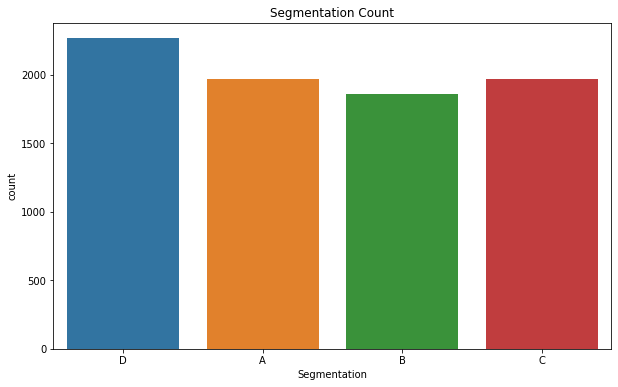

In [503]:
plt.figure(figsize=(10,6))
plt.title('Segmentation Count')
sns.countplot(x=train_data.Segmentation)

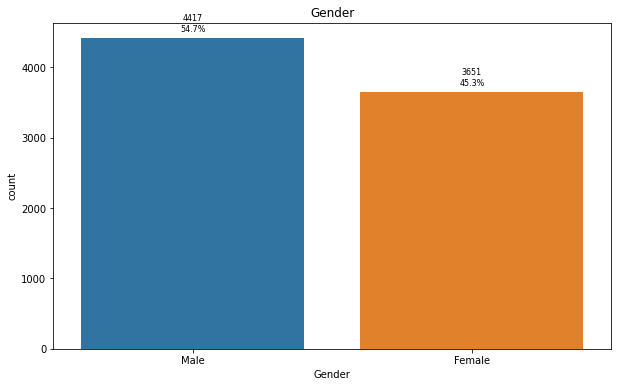

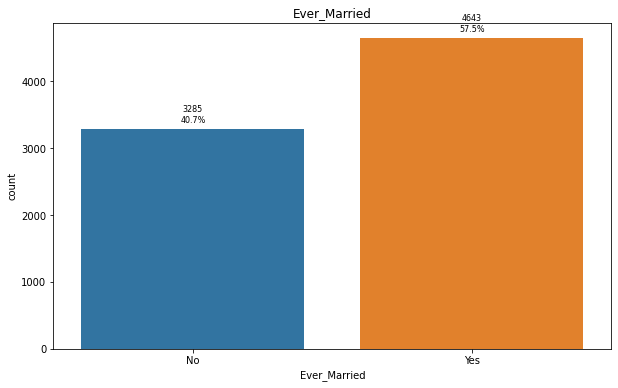

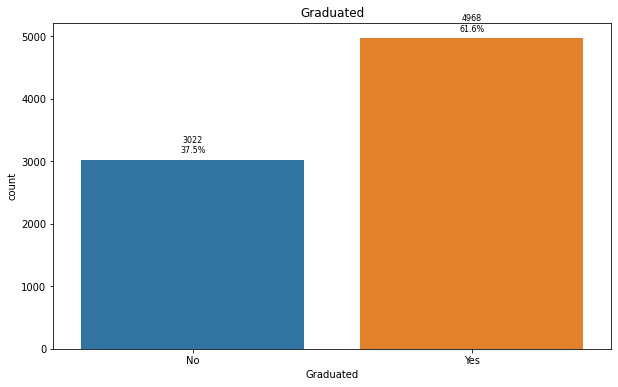

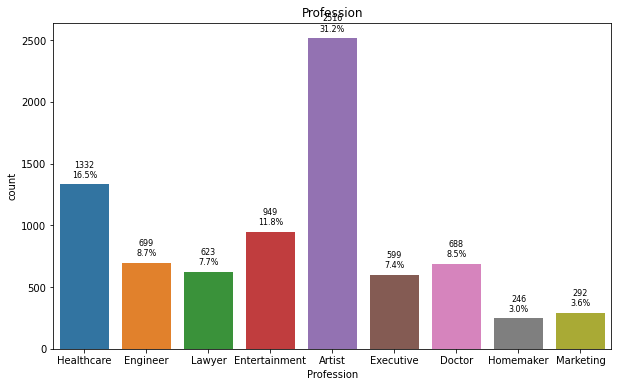

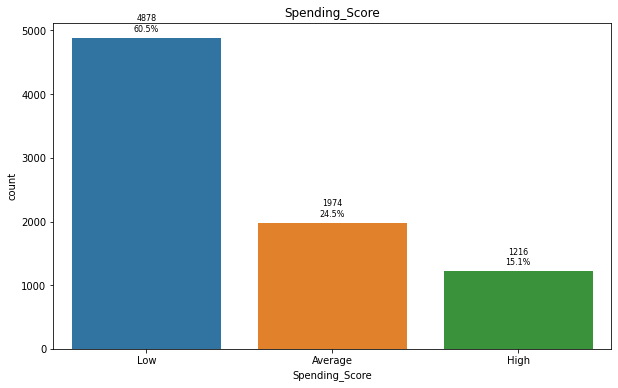

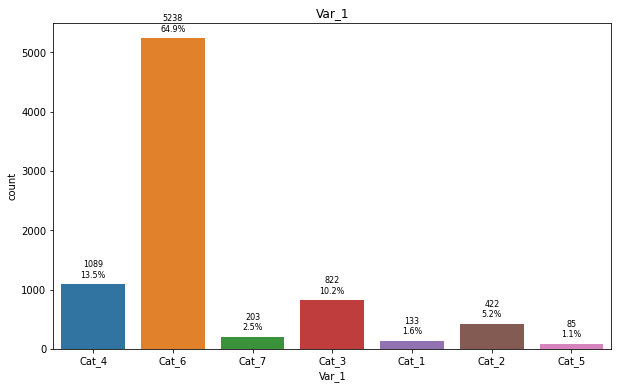

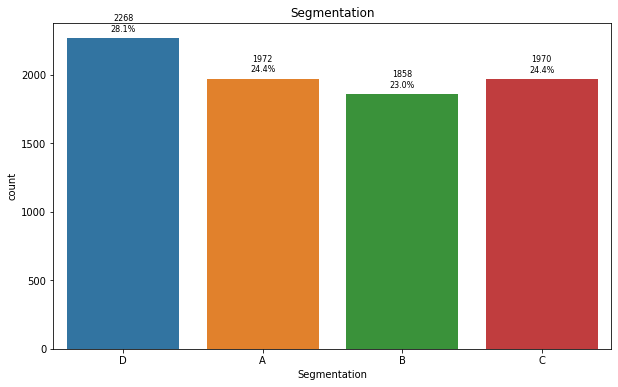

In [504]:
for i in cat_var_list:
    plt.figure(figsize=(10,6))
    plt.title(f'{i}')
    ax = sns.countplot(data=train_data, x=i)  # get the axis object
    # Get the total count of each category
    total_count = len(train_data[i])
    # Iterate over each bar in the plot
    for p in ax.patches:
        # Get the height of the bar
        height = p.get_height()
        # Calculate the percentage of the total count that this bar represents
        percentage = 100 * height / total_count
        # Add the count value on top of the bar
        ax.annotate(f'{height}\n{percentage:.1f}%', 
                    xy=(p.get_x() + p.get_width() / 2., height), 
                    xytext=(0, 5), 
                    textcoords='offset points', 
                    ha='center', va='bottom', 
                    fontsize=8)

In [505]:
cat_var_list

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1',
 'Segmentation']

In [506]:
col= ['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1']

Segmentation Analysis

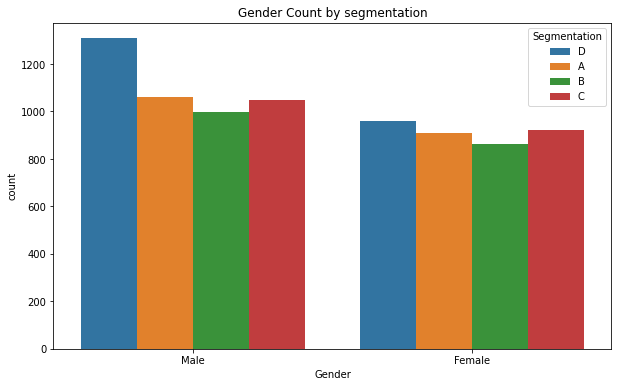

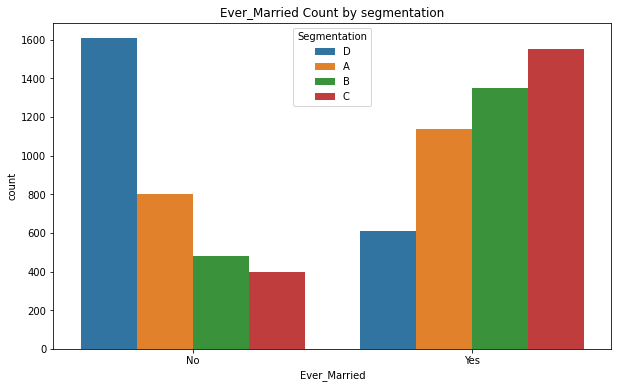

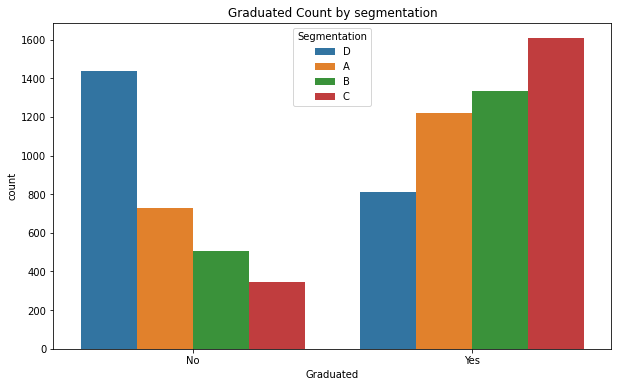

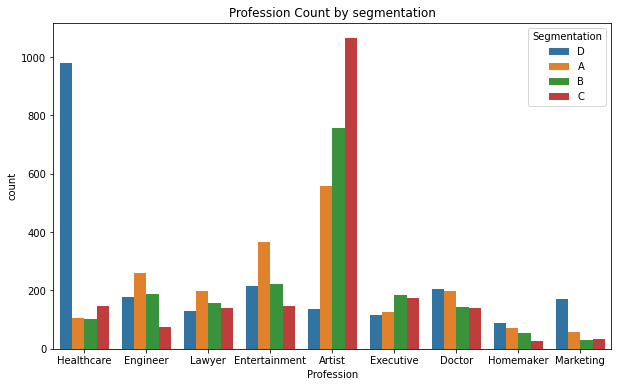

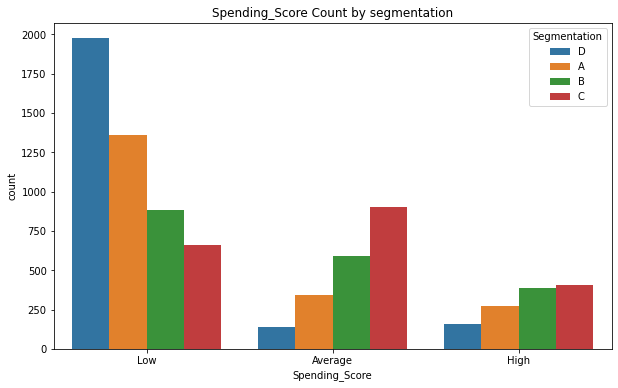

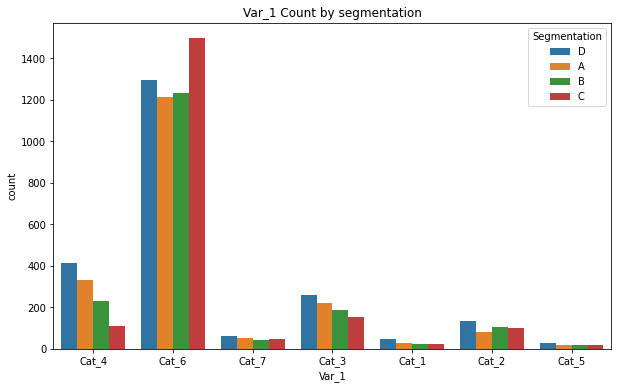

In [507]:
for j in col:
    plt.figure(figsize=(10,6))
    plt.title(f'{j} Count by segmentation')
    sns.countplot(data=train_data, x= j,hue='Segmentation')
    
    

### HISTOGRAM PLOT VISUALISATION

In [508]:

num_miss_list = variables_overview.loc[~(variables_overview["dtype"] == "object")]
num_miss_list=num_miss_list.index.to_list()


In [509]:
num_miss_list.remove('ID')


In [510]:
num_miss_list

['Age', 'Work_Experience', 'Family_Size']

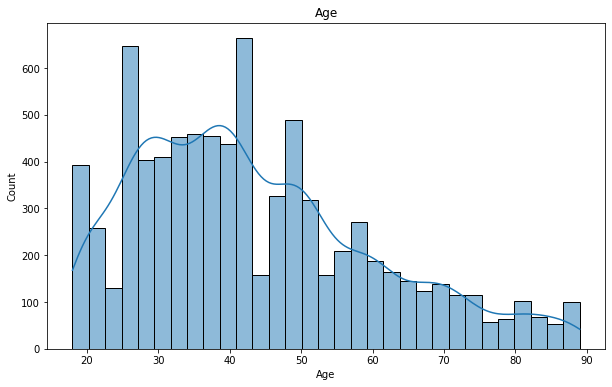

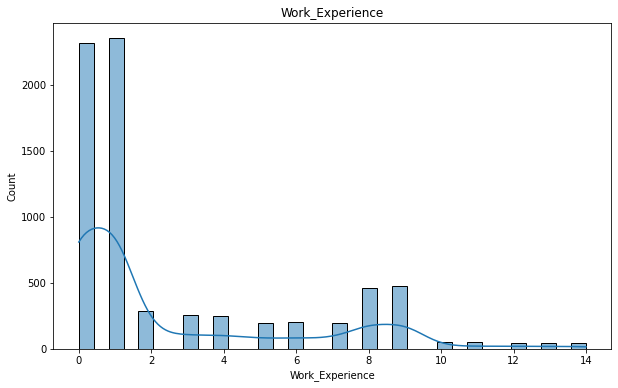

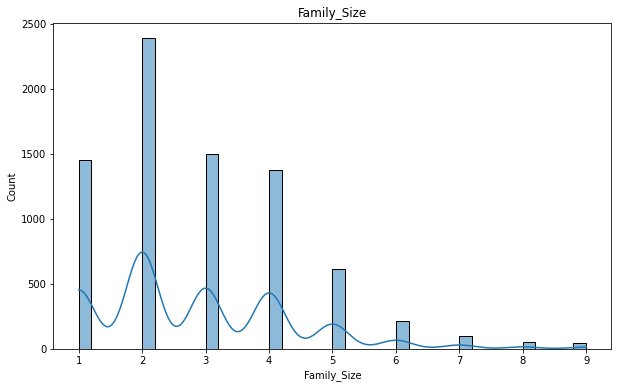

In [511]:
for n in num_miss_list:
    plt.figure(figsize=(10,6))
    plt.title(f'{n}')
    sns.histplot(data=train_data,x=n,kde=True)
    

### FEATURE ENGINEERING

### Building Model

- LogisticRegression: a classification model that uses logistic regression to estimate the probability of a binary target variable.
- KNeighborsClassifier: a classification model that uses the k-nearest neighbors algorithm to classify new instances based on the k nearest neighbors in the training set.
- SVC: a classification model that uses a support vector machine to find the hyperplane that separates the different classes.
- DecisionTreeClassifier: a classification model that uses a decision tree to split the data into smaller subgroups and make predictions based on the features that are most important for each subgroup.
- RandomForestClassifier: an ensemble model that combines multiple decision trees to make predictions.
- GradientBoostingClassifier: an ensemble model that trains weak models (e.g., decision trees) sequentially and combines their predictions to improve accuracy.
- AdaBoostClassifier: an ensemble model that trains a series of weak models (e.g., decision stumps) sequentially, with each new model focusing on the instances that were misclassified by the previous models.
- XGBClassifier: an implementation of gradient boosting that is optimized for speed and performance.
- classification_report: a function that generates a report with precision, recall, and F1-score for each class, as well as the overall accuracy, for the model.

In [512]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [513]:
#make a copy 
model_data = imputed_data.copy()


In [514]:
#Check for null values before feeding to the machine
variables_overview1(model_data)

,unique,dtype,null,null %
Age,67,float64,0,0.0
Work_Experience,81,float64,0,0.0
Family_Size,28,float64,0,0.0
Segmentation,4,float64,0,0.0
Gender_Female,2,float64,0,0.0
Gender_Male,2,float64,0,0.0
Ever_Married_No,2,float64,0,0.0
Ever_Married_Yes,2,float64,0,0.0
Graduated_No,2,float64,0,0.0
Graduated_Yes,2,float64,0,0.0


Create a dictionary called models that contains instances of the several machine learning models from scikit-learn and XGBoost libraries which will be used.
- Each model is initialized with its default hyperparameters except for LogisticRegression, which has max_iter=10000. This means that the logistic regression model will run for a maximum of 10,000 iterations

In [515]:
models = {'LogisticRegression':  LogisticRegression(max_iter=10000, multi_class='multinomial'),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'XGBClassifier': XGBClassifier()}

Use the train_test_split function from scikit-learn to split a dataset into training and testing sets.

In [516]:
from sklearn.model_selection import train_test_split

features = model_data.drop(columns=['Segmentation'],axis=1)
target = model_data['Segmentation']
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=0)

In [517]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [519]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(0)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores,index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
    
    
    return model_scores

In [520]:
for name, model in models.items():
    print(f"Training model: {name}")
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)

Training model: LogisticRegression
Training model: KNeighborsClassifier
Training model: SVC
Training model: DecisionTreeClassifier
Training model: RandomForestClassifier
Training model: GradientBoostingClassifier
Training model: AdaBoostClassifier
Training model: XGBClassifier


In [527]:
# Convert scores to a dataframe with the model names and scores
score_df = pd.DataFrame.from_dict(model_scores, orient='index', columns=['Score'])
score_df.index.name = 'Model'

# Sort the dataframe by score in descending order
score_df = score_df.sort_values('Score', ascending=False)

# Apply the background gradient to the scores column and display the dataframe
cm = sns.color_palette('PuBuGn', as_cmap=True)
score_df_style = score_df.style.background_gradient(cmap=cm)
score_df_style

TypeError: 'numpy.ndarray' object is not callable

In [531]:
cm = sns.color_palette('PuBuGn',as_cmap=True)
score = model_scores.style.background_gradient(cmap=cm)
score

,Score,LogisticRegression,KNeighborsClassifier,SVC,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,XGBClassifier
DecisionTreeClassifier,0.435564,0.505576,0.469021,0.492565,0.428129,0.485130,0.521066,0.513631,0.483271
KNeighborsClassifier,0.469021,0.505576,0.469021,0.492565,0.428129,0.485130,0.521066,0.513631,0.483271
XGBClassifier,0.483271,0.505576,0.469021,0.492565,0.428129,0.485130,0.521066,0.513631,0.483271
RandomForestClassifier,0.484511,0.505576,0.469021,0.492565,0.428129,0.485130,0.521066,0.513631,0.483271
SVC,0.492565,0.505576,0.469021,0.492565,0.428129,0.485130,0.521066,0.513631,0.483271
LogisticRegression,0.505576,0.505576,0.469021,0.492565,0.428129,0.485130,0.521066,0.513631,0.483271
AdaBoostClassifier,0.513631,0.505576,0.469021,0.492565,0.428129,0.485130,0.521066,0.513631,0.483271
GradientBoostingClassifier,0.521066,0.505576,0.469021,0.492565,0.428129,0.485130,0.521066,0.513631,0.483271


In [522]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

def randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test):
    np.random.seed(0)
    
    model_rs_scores = {}
    model_rs_best_param = {}
    
    for name, model in models.items():
        rs_model = RandomizedSearchCV(model,
                                      param_distributions=params[name],
                                      cv=5,
                                      n_iter=20,n_jobs=-1,
                                      verbose=2)        
        rs_model.fit(X_train,y_train)
        model_rs_scores[name] = rs_model.score(X_test,y_test)
        model_rs_best_param[name] = rs_model.best_params_
        
    return model_rs_scores, model_rs_best_param

In [583]:
models = {'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier()
         }

params = {'AdaBoostClassifier': {'n_estimators': [20,50,100,200,400],
                                'learning_rate': [0.001,0.01,0.1,1.0],
                                'algorithm': ['SAMME','SAMME.R']},
          'GradientBoostingClassifier' : {'loss': ['deviance'],
                                          'learning_rate': [0.001,0.01,0.1,1.0],
                                          'n_estimators': [20,50,100,200,400],
                                          'criterion': ['friedman_mse', 'mse'],
                                          'max_depth' : [2,3,6,10,20],
                                          'ccp_alpha' : [0.0,0.001,0.01,0.1,1]
                                          }
         }

In [584]:
# Define the parameter grids for each model
param_randsearch = {
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'DecisionTreeClassifier': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'RandomForestClassifier': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'GradientBoostingClassifier': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'AdaBoostClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1]},
    'XGBClassifier': {'n_estimators': [100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 1]}
}

In [585]:
model_rs_scores,model_rs_best_param = randomsearch_cv_scores(models,param_randsearch,X_train,X_test,y_train,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 9 is smaller than n_iter=20. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [534]:
model_rs_scores = pd.DataFrame(model_rs_scores,index=['Score']).transpose()
model_rs_scores.sort_values('Score')

,Score
GradientBoostingClassifier,0.516729
AdaBoostClassifier,0.524783


In [535]:
model_rs_best_param

{'AdaBoostClassifier': {'n_estimators': 400,
  'learning_rate': 0.1,
  'algorithm': 'SAMME.R'},
 'GradientBoostingClassifier': {'n_estimators': 20,
  'max_depth': 3,
  'loss': 'deviance',
  'learning_rate': 0.1,
  'criterion': 'friedman_mse',
  'ccp_alpha': 0.0}}

### GRID SEARCH

In [580]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000, multi_class='multinomial'),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'XGBClassifier': XGBClassifier()}

In [581]:
params = {'LogisticRegression': {'penalty': ['l2'],
                                 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                 'solver': ['newton-cg', 'lbfgs', 'saga']},
          'KNeighborsClassifier': {'n_neighbors': [3, 5, 7, 9],
                                   'weights': ['uniform', 'distance'],
                                   'metric': ['euclidean', 'manhattan']},
          'SVC': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'gamma': ['scale', 'auto']},
          'DecisionTreeClassifier': {'criterion': ['gini', 'entropy'],
                                     'max_depth': [None, 2, 5, 10],
                                     'min_samples_split': [2, 5, 10]},
          'RandomForestClassifier': {'n_estimators': [50, 100, 200],
                                     'max_depth': [None, 2, 5, 10],
                                     'min_samples_split': [2, 5, 10]},
          'GradientBoostingClassifier': {'loss': ['deviance', 'exponential'],
                                         'learning_rate': [0.001, 0.01, 0.1, 1],
                                         'n_estimators': [50, 100, 200],
                                         'max_depth': [2, 5, 10]},
          'AdaBoostClassifier': {'algorithm': ['SAMME', 'SAMME.R'],
                                 'n_estimators': [50, 100, 200],
                                 'learning_rate': [0.001, 0.01, 0.1, 1]},
          'XGBClassifier': {'max_depth': [3, 5, 7, 10],
                            'learning_rate': [0.001, 0.01, 0.1, 1],
                            'n_estimators': [50, 100, 200],
                            'gamma': [0, 0.1, 1]}}

In [550]:
from sklearn.model_selection import GridSearchCV

In [579]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

# Assuming you have already defined models and params

results = pd.DataFrame(columns=['Model', 'Best Parameters', 'Best Score'])

for name, model in models.items():
    params_grid = params[name]
    grid_search = GridSearchCV(model, params_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Append results to the data frame
    results = results.append({
        'Model': name,
        'Best Parameters': grid_search.best_params_,
        'Best Score': grid_search.best_score_
    }, ignore_index=True)

print(results)

<ipython-input-579-27a48f4af2d0>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-579-27a48f4af2d0>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


KeyboardInterrupt: 

LogisticRegression
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score: 0.5116249046769826


KNeighborsClassifier
Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best score: 0.49643795147082664


SVC
Best parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best score: 0.514878677066633


DecisionTreeClassifier
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best score: 0.5189064423348284


RandomForestClassifier
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.5402879805931343




/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is e

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is e

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is e

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is e

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is e

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is e

GradientBoostingClassifier
Best parameters: {'learning_rate': 0.001, 'loss': 'deviance', 'max_depth': 2, 'n_estimators': 50}
Best score: 0.2815308126024535


AdaBoostClassifier
Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}
Best score: 0.5196824767772114


XGBClassifier
Best parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best score: 0.5416826088784009




# EVALUTAION

In [536]:
from sklearn.metrics import classification_report,plot_confusion_matrix 
from sklearn.model_selection import cross_val_score

### AdaBoostClassifier

In [537]:
ada = AdaBoostClassifier(n_estimators=400,learning_rate=0.1,algorithm='SAMME.R')
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

In [538]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.53      0.48       384
           1       0.45      0.24      0.31       399
           2       0.48      0.63      0.55       380
           3       0.70      0.69      0.69       451

    accuracy                           0.52      1614
   macro avg       0.52      0.52      0.51      1614
weighted avg       0.53      0.52      0.51      1614



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


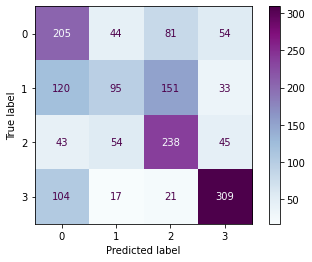

In [539]:
plot_confusion_matrix(ada,X_test,y_test,cmap='BuPu')

In [540]:
cv_accuracy = cross_val_score(ada,X_train,y_train,cv=5,scoring='accuracy')

In [541]:
print(f'Cross Validaion accuracy Scores: {cv_accuracy}')
print(f'Cross Validation accuracy Mean Score: {cv_accuracy.mean()}')

Cross Validaion accuracy Scores: [0.50580945 0.51975213 0.50348567 0.5112316  0.54108527]
Cross Validation accuracy Mean Score: 0.5162728249839377


### FEATURE IMPORTANCE

In [542]:
feat_importance = ada.feature_importances_
feat_importance = pd.DataFrame(feat_importance,
                               columns=['Score'],
                               index=features.columns)

In [543]:
feat_importance.sort_values(by='Score',ascending=False).style.background_gradient(cmap=cm)

,Score
Age,0.225000
Family_Size,0.142500
Work_Experience,0.060000
Profession_Healthcare,0.052500
Var_1_Cat_4,0.050000
Spending_Score_Average,0.045000
Graduated_No,0.045000
Profession_Artist,0.040000
Profession_Entertainment,0.037500
Profession_Marketing,0.035000


<AxesSubplot:title={'center':'Feature Importances'}, xlabel='Score'>

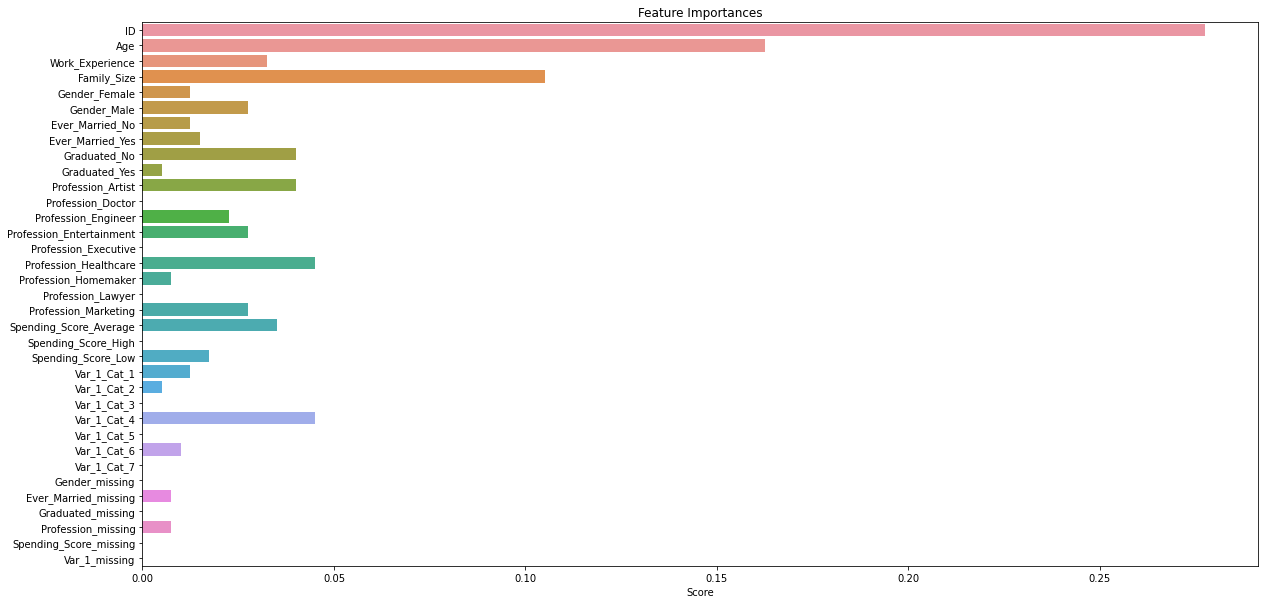

In [295]:
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
sns.barplot(x=feat_importance.Score,y=feat_importance.index)

In [277]:
model212 = LogisticRegression(max_iter=10000)
model212.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [280]:
# Evaluate the model212 on the test data
y_pred = model212.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted", pos_label="Yes")
recall = recall_score(y_test, y_pred, average="weighted", pos_label="Yes")
f1 = f1_score(y_test, y_pred, average="weighted", pos_label="Yes")
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

Accuracy: 0.51, Precision: 0.50, Recall: 0.51, F1-score: 0.49


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'Yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [143]:



X_encoded = pd.get_dummies(X)  # encode categorical variables
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary", pos_label="Yes")
recall = recall_score(y_test, y_pred, average="binary", pos_label="Yes")
f1 = f1_score(y_test, y_pred, average="binary", pos_label="Yes")
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

Accuracy: 0.82, Precision: 0.84, Recall: 0.86, F1-score: 0.85
